In [12]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("E:\Product review Analysis\Reviews.csv")

In [3]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [4]:
data=data[["Summary","Score"]]

In [5]:
data=data.sample(frac=1)[:20000]

In [6]:
data.loc[data.Score<3, "Score"] = -1
data.loc[data.Score==3, "Score"] = 0
data.loc[data.Score>3, "Score"] = 1

In [7]:
data.head()

,Summary,Score
532840,not my fav,-1
385286,"Yeah, I can't use these...",0
346072,taste is so so,0
294582,Not flavored,-1
502468,A great sampler!,1


In [8]:
data['Summary'] = data['Summary'].str.replace(r'[^\w\s]+', '')
data['Summary']=data['Summary'].str.replace('\d+', ' ')
data["Summary"]= data["Summary"].str.lower()

In [9]:
data.head()

,Summary,Score
532840,not my fav,-1
385286,yeah i cant use these,0
346072,taste is so so,0
294582,not flavored,-1
502468,a great sampler,1


In [10]:
data['Summary'].dropna(inplace=True)

In [11]:
data["Summary"]=data["Summary"].apply(nltk.word_tokenize)

In [12]:
data.head()

,Summary,Score
532840,"[not, my, fav]",-1
385286,"[yeah, i, cant, use, these]",0
346072,"[taste, is, so, so]",0
294582,"[not, flavored]",-1
502468,"[a, great, sampler]",1


In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\areeb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [14]:
stop=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'other','some', 'such', 'own', 'same', 'so', 'than', 's', 't', 'can', 'will', 'just', 'don', 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'ma', 'mustn', 'needn', 'shan']

In [15]:
data['Summary']=(data['Summary'].dropna()
                 .apply(lambda x: [item for item in x if item not in stop]))                               

In [16]:
data.head()

,Summary,Score
532840,"[not, fav]",-1
385286,"[yeah, cant, use]",0
346072,[taste],0
294582,"[not, flavored]",-1
502468,"[great, sampler]",1


In [17]:
ps=PorterStemmer()
data["Summary"]=(data["Summary"].dropna()
                 .apply(lambda x: ' '.join([ps.stem(i) for i in x])))

In [18]:
data.head()

,Summary,Score
532840,not fav,-1
385286,yeah cant use,0
346072,tast,0
294582,not flavor,-1
502468,great sampler,1


In [19]:
data['Summary'] = data['Summary'].str.replace(r'[^\w\s]+', '')

In [20]:
data.head()

,Summary,Score
532840,not fav,-1
385286,yeah cant use,0
346072,tast,0
294582,not flavor,-1
502468,great sampler,1


In [21]:
X=data["Summary"]
Y=data["Score"]

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X1=cv.fit_transform(X.values.astype('U')).toarray()

In [23]:
X1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y,test_size=0.2)

In [27]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [28]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [29]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
model.score(x_test,y_test)

0.846

In [33]:
y_pred=model.predict(x_test)

In [34]:
from sklearn import metrics 
print("Random Forest model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Random Forest model accuracy(in %): 84.6


In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 384,   41,  177],
       [  75,   60,  136],
       [ 139,   48, 2940]], dtype=int64)

Text(33.0, 0.5, 'Truth')

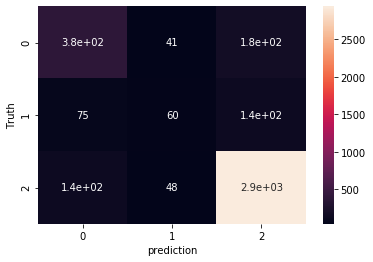

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel("prediction")
plt.ylabel("Truth")

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\areeb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
lr.score(x_test,y_test)

0.84875

In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 384,   41,  177],
       [  75,   60,  136],
       [ 139,   48, 2940]], dtype=int64)

Text(33.0, 0.5, 'Truth')

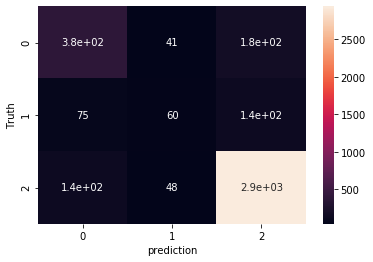

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel("prediction")
plt.ylabel("Truth")

In [42]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
y_pred = gnb.predict(x_test) 

In [44]:
gnb.score(x_test,y_test)

0.302

In [ ]:
from sklearn.svm import SVC
sc=SVC()

In [ ]:
sc.fit(x_train,y_train)

In [ ]:
sc.score(x_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel("prediction")
plt.ylabel("Truth")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=125,p=3)

In [ ]:
classifier.fit(x_train,y_train)

In [ ]:
classifier.score(x_test,y_test)